In [1]:
# Let's import some utilities and configure our notebook, nothing important here...
%matplotlib inline
from future.utils import string_types
import os.path as op
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import partial
from itertools import product
from simone import staircases

# qgrid reminder
# import qgrid
# qgrid.nbinstall(overwrite=True)
# qgrid.show_grid(exps_df)

In [2]:
# First thing first, let's just load the data
subjects_df, colors_df, trials_df, exps_df = staircases()

# Usually you only need to work witht exps_df.
# exps_df contains the experiment data arranged one "experiment" per row
# A experiment is a full staircase
# The staircase + responses are in their own dataframe in the column "series"
# There are many columns that correspond to staircase statistics

# What is in store?
exps_df.sample(5)

,participant,staircase,staircase_repetition,reversal_method,omit,exp_start,age,gender,education,vision,...,measured_scene_l_achromatic__mean__last5,measured_scene_l_achromatic__min__last5,measured_scene_l_achromatic__range__last5,measured_scene_l_achromatic__std__last5,wall_minus_scene_l_achromatic__max__last5,wall_minus_scene_l_achromatic__mean__last5,wall_minus_scene_l_achromatic__min__last5,wall_minus_scene_l_achromatic__range__last5,wall_minus_scene_l_achromatic__std__last5,staircase_length
479,35,M-C3,1,simple-reversals,False,2016-07-16 12:00:00,28.0,F,L + A,C,...,27.82,26.1,3.1,1.215566,-0.8,-1.98,-3.5,2.7,1.110675,9
442,32,M-C3,0,simple-reversals,False,2016-07-15 17:00:00,35.0,M,L,N,...,32.30,30.4,4.3,1.466970,7.2,2.72,0.3,6.9,2.406990,13
260,17,M-C2,0,simple-reversals,False,2016-07-11 19:00:00,37.0,F,A,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
207,13,C2-M,1,simple-reversals,False,2016-07-11 14:00:00,21.0,F,L + I,N,...,29.96,27.1,5.9,2.580388,2.9,0.04,-3.0,5.9,2.436883,14
10,0,C3-M,1,double-reversals,True,NaT,NaN,None,None,None,...,31.96,31.4,1.6,0.585150,2.9,1.86,1.1,1.8,0.685857,24


In [3]:
# Select only some experiments
selected_exps_df = exps_df.query('not omit and '
                                 'reversal_method == "simple-reversals" and '
                                 'staircase_repetition in [0, 1]')

In [4]:
# Here we have a simple function to plot distribution densities and CDFs
# It is very generic, so you will want to fine-tune for important plots
def distro_plot(exps_df, label_names='gender', summarizer='measured_scene_l_achromatic__mean__last2'):
    if isinstance(label_names, string_types):
        label_names = [label_names]
    fig, (top, bottom) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False,
                                  figsize=(18, 12))
    for labels, label_df in exps_df.groupby(label_names):
        label = '%s (n=%d)' % (' - '.join(labels), len(label_df))
        sns.distplot(label_df[summarizer], label=label, hist=False, rug=True, ax=top)
        sns.kdeplot(label_df[summarizer], label=label, shade=True, cumulative=True, ax=bottom)
    plt.suptitle(' - '.join(label_names), fontsize=20)
    return fig

Women find the achromatic has more light with less luminance
============================================================

If we do not group by color, it seems that women are in general finding the achromatic provides more light for smaller values of luminance

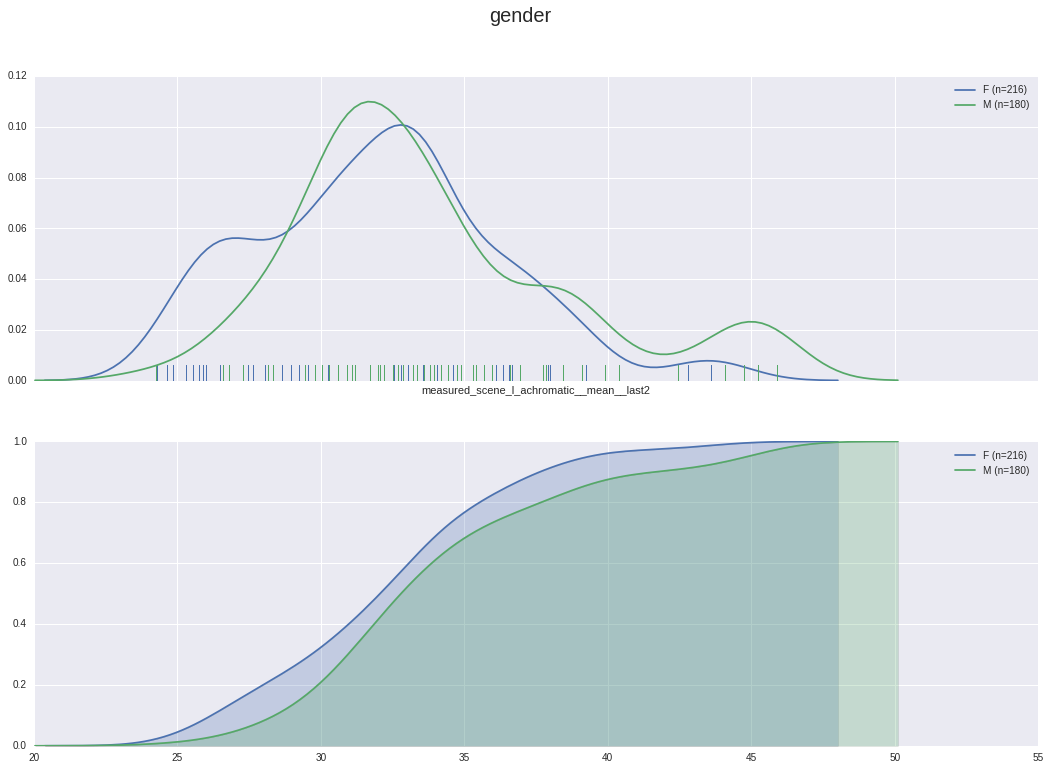

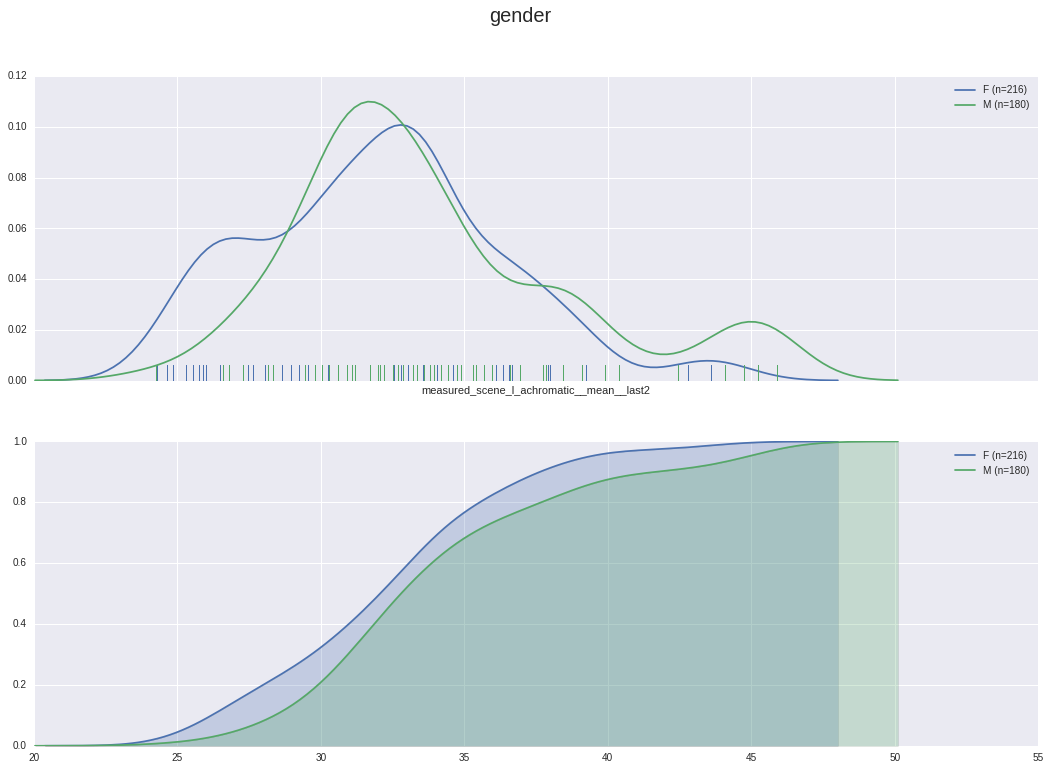

In [5]:
# When are revesals happening, per gender?
distro_plot(selected_exps_df, label_names='gender', summarizer='measured_scene_l_achromatic__mean__last2')

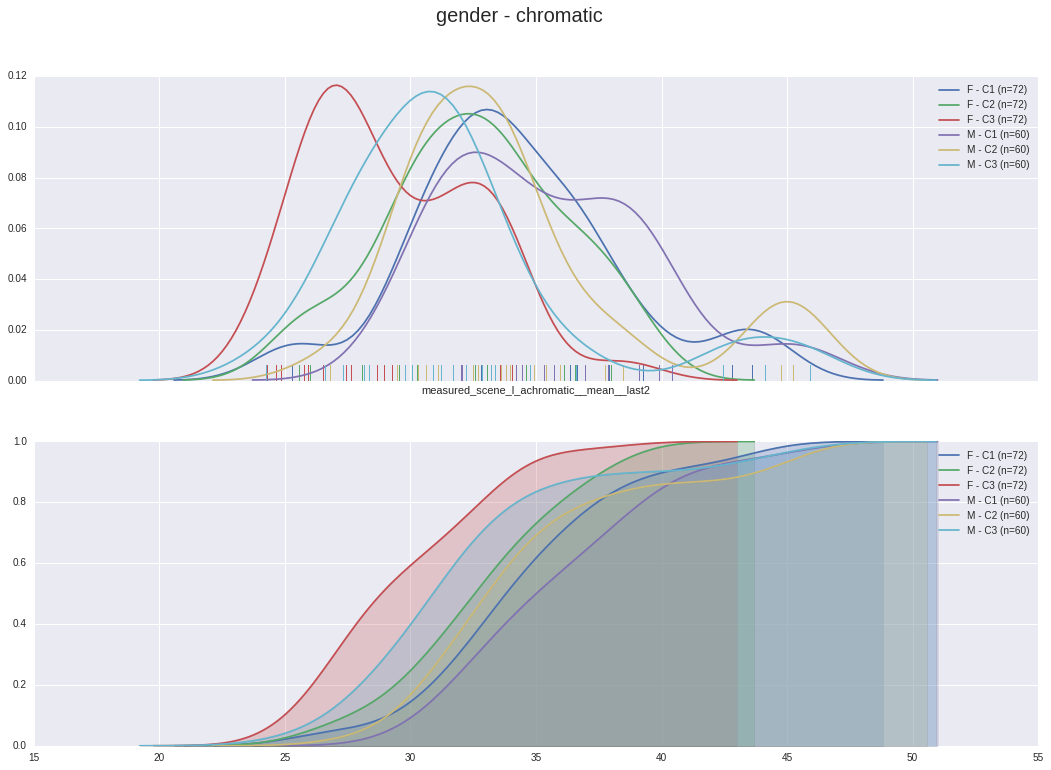

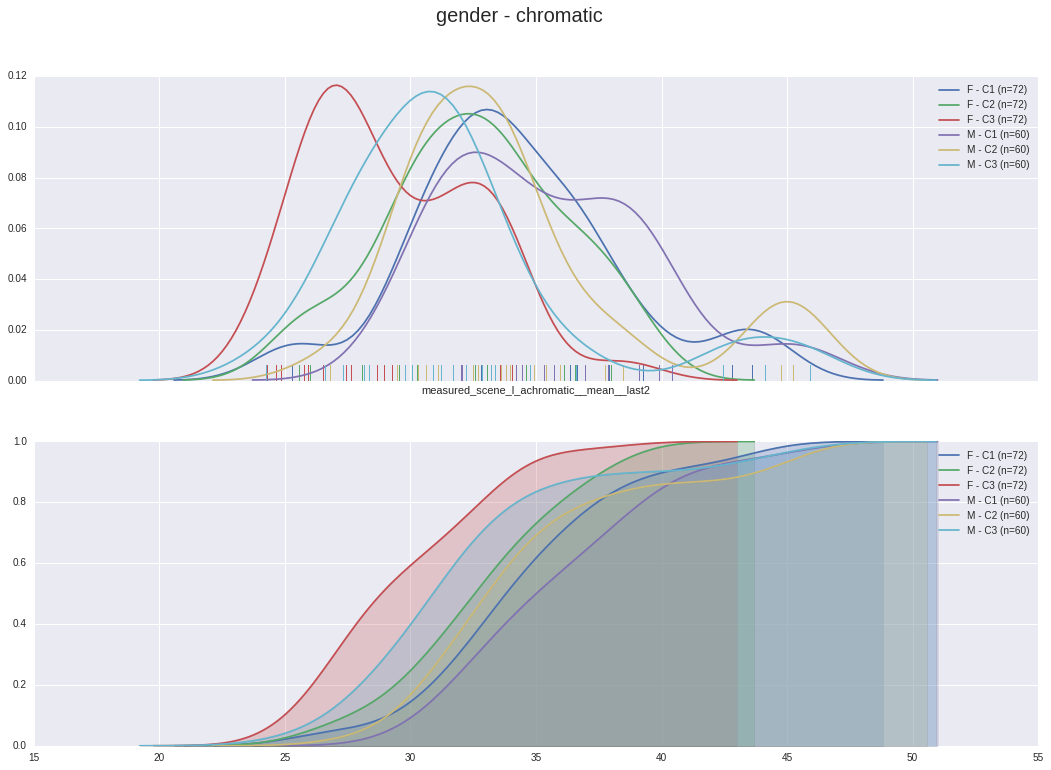

In [6]:
# When are revesals happening, per gender and color?
distro_plot(selected_exps_df, label_names=['gender', 'chromatic'], summarizer='measured_scene_l_achromatic__mean__last2')
# It should be easy to tweak this so that F/M show different strokes and colors are representative of C1, C2, C3...